In [158]:
import pandas as pd
from glob import glob
def getDataFromDay(day):
    dataframes = []
    for f in glob(day+"/*.json"):
        dataframes.append(pd.read_json(f,lines=True))
    dataDay = pd.concat(dataframes)
    return(dataDay)
def extractUserData(data):
    captured_keys = ['friends_count','favourites_count', 'description','screen_name', 'geo_enabled', 'lang', 'verified','time_zone','statuses_count', 'followers_count', 'following', 'name', 'location','created_at']
    users = set()
    userData = {}
    for key in captured_keys:
        userData[key] = []
    for ind,val in data.iterrows():
        if val['user']['name'] not in users:
            users.add(val['user']['name'])
            for key in captured_keys:
                userData[key].append(val['user'][key])
    userFrame = pd.DataFrame()
    for key in userData.keys():
        print(key,len(userData[key]))
        userFrame[key] = userData[key]
    return userFrame

def getRetweetData(data_1):
    user_dict = {}
    follower_dict = {}
    account_creation_dict = {}
    location_dict = {}
    hashtag_dict = {}
    #if statement, to count of often a user is retweeted in the user_dict
    for retweeted in data_1['retweeted_status']:
        if retweeted['user']['name'] in user_dict.keys():
            user_dict[retweeted['user']['name']] += 1
        else:
            user_dict[retweeted['user']['name']] = 1 #also get the user's follower_count, created date, location, and used hasgtags
            follower_dict[retweeted['user']['name']] = retweeted['user']['followers_count']
            account_creation_dict[retweeted['user']['name']] = retweeted['user']['created_at']
            location_dict[retweeted['user']['name']] = retweeted['user']['location']
            hashtag_dict[retweeted['user']['name']] = retweeted['entities']['hashtags']


    retweet_data = pd.DataFrame()
    retweet_data['user'] = list(user_dict.keys())
    retweet_data['retweeted'] = list(user_dict.values())
    retweet_data['followers_count'] = list(follower_dict.values())
    retweet_data['created_at'] = list(account_creation_dict.values())
    retweet_data['location'] = list(location_dict.values())
    retweet_data['hastags'] = list(hashtag_dict.values())
    return retweet_data

location_dict = {'UK': 'United Kingdom', 'USA': 'United States', 'London': 'London, England', 'London ': 'London, England', ' London': 'London, England', 'London, UK': 'London, England', 'England': 'England, United Kingdom', 'Manchester': 'Manchester, England', 'London, England': 'London, England', 'United Kingdom': 'United Kingdom', 'England, United Kingdom': 'England, United Kingdom', 'Manchester, England': 'Manchester, England', 'United States': 'United States', 'Scotland': 'Scotland, United Kingdom', 'Liverpool': 'Liverpool, England', 'Paris': 'Paris, France', 'France': 'France', 'Edinburgh': 'Edinburgh, Scotland', 'Glasgow': 'Glasgow, Scotland', 'Glasgow, Scotland': 'Glasgow, Scotland', 'Washington, DC': 'Washington, United States', 'Brussels': 'Brussels, Belgium', 'london': 'London, England', 'New York, NY': 'New York, United States', 'Edinburgh, Scotland': 'Edinburgh, Scotland', 'Bristol': 'Bristol, England', 'Ireland': 'Ireland', 'Birmingham, England': 'Birmingham, England', 'Leeds': 'Leeds, England', 'Berlin': 'Berlin, Germany', 'Sheffield': 'Sheffield, England', 'Europe': 'Europe', 'Scotland, United Kingdom': 'Scotland, United Kingdom', 'Madrid': 'Madrid, Spain', 'London, United Kingdom': 'London, England', 'Nottingham': 'Nottingham, England', 'Liverpool, England': 'Liverpool, England', 'Birmingham': 'Birmingham, England', 'Paris, France': 'Paris, France', 'Brussels, Belgium': 'Brussels, Belgium', 'Manchester, UK': 'Manchester, England', 'Cardiff': 'Cardiff, Wales', 'Bristol, England': 'Bristol, England', 'New York': 'New York, United States', 'Leeds, England': 'Leeds, England', 'Essex': 'Essex, England', 'North West, England': 'North West, England', 'South East, England': 'South East, England', 'Dublin': 'Dublin, Ireland', 'Germany': 'Germany', 'Australia': 'Australia', 'Earth': 'Earth', 'Belfast': 'Belfast, North Ireland', 'India': 'India', 'Sheffield, England': 'Sheffield, England', 'Canada': 'Canada', 'Brighton': 'Brighton, England', 'Global': 'Earth', 'Worldwide': 'Earth', 'Wales, United Kingdom': 'Wales, United Kingdom', 'Cardiff, Wales': 'Cardiff, Wales', 'South West, England': 'South West, England', 'Wales': 'Wales, United Kingdom', 'Birmingham, UK': 'Birmingham, England', 'Dublin, Ireland': 'Dublin, Ireland', 'Oxford': 'Oxford, England', 'Amsterdam': 'Amsterdam, Netherlands', 'Nottingham, England': 'Nottingham, England', 'uk': 'United Kingdom', 'Northern Ireland': 'Northern Ireland', 'Yorkshire': 'Yorkshire, England', 'London UK': 'London, England', 'España': 'Spain', 'Los Angeles, CA': 'Los Angeles, United States', 'Singapore': 'Singapore', 'Belfast, Northern Ireland': 'Belfast, Northern Ireland', 'Newcastle Upon Tyne, England': 'Newcastle Upon Tyne, England', 'Cambridge, England': 'Cambridge, England', 'Bristol, UK': 'Bristol, England', 'Brighton, England': 'Brighton, England', 'Kent': 'Kent, England', 'Berlin, Germany': 'Berlin, Germany', 'Cambridge': 'Cambridge, England', 'Barcelona': 'Barcelona, Spain', 'Cambridge, UK': 'Cambridge, England', 'California, USA': 'California, United States', 'Paris, Ile-de-France': 'Paris, France', 'West Midlands, England': 'West Midlands, England', 'México': 'Mexico', 'New York, USA': 'New York, United States', 'Everywhere': 'Earth', 'Nederland': 'Netherlands', 'Leicester': 'Leicester, England', 'Southampton': 'Southampton, England', 'Hong Kong': 'Hong Kong, China', 'Oxford, England': 'Oxford, England', 'New York City': 'New York, United States', 'Surrey': 'Surrey, England', 'Norwich': 'Norwich, England', 'Dublin City, Ireland': 'Dublin, Ireland', 'North East, England': 'North East, England', 'Netherlands': 'Netherlands', 'York': 'York, England', 'Leicester, England': 'Leicester, England', 'Italy': 'Italy', 'Deutschland': 'Germany', 'Planet Earth': 'Earth', 'Italia': 'Italy', 'Norwich, England': 'Norwich, England', 'Roma': 'Rome, Italy', 'Cheshire': 'Cheshire, England', 'Chicago, IL': 'Chicago, United States', 'Toronto': 'Toronto, Canada', 'Thailand': 'Thailand', 'Spain': 'Spain', 'Boston, MA': 'Boston, United States', 'Newcastle upon Tyne': 'Newcastle upon Tyne, England', 'The Netherlands': 'Netherlands', 'Southampton, England': 'Southampton, England', 'Florida, USA': 'Florida, United States', 'Washington, D.C.': 'Washington, United States', 'Newcastle': 'Newcastle, England', 'Sweden': 'Sweden', 'Sydney': 'Sydney, Australia', 'South Africa': 'South Africa', 'San Francisco, CA': 'San Francisco, United States', 'Cornwall': 'Cornwall, England', 'Mumbai': 'Mumbai, India', 'NYC': 'New York, United States', 'Stockholm': 'Stockholm, Sweden', 'East Midlands, England': 'East Midlands, England', 'Athens, Greece': 'Athens, Greece', 'Texas, USA': 'Texas, United States', 'Texas': 'Texas, United States', 'Belgium': 'Belgium', 'UK ': 'United Kingdom', 'Toronto, Ontario': 'Toronto, Canada', 'Brooklyn, NY': 'New York, United States', 'Berlin, Deutschland': 'Berlin, Germany', 'Lancashire': 'Lancashire, England', 'Sydney, Australia': 'Sydney, Australia', 'South London': 'London, England', 'Los Angeles': 'Los Angeles, United States', 'Hogwarts': 'England', 'Sheffield, UK': 'Sheffield, England', 'Hertfordshire': 'Hertfordshire, England', 'Oxford, UK': 'Oxford, England', 'Aberdeen': 'Aberdeen, Scotland', 'Greece': 'Greece', 'City of London, London': 'London, England', 'LONDON': 'London, England', 'Liverpool, UK': 'Liverpool, England', 'Gibraltar': 'Gibraltar', 'York, England': 'York, England', 'Leeds, UK': 'Leeds, England', 'Chicago': 'Chicago, United States', 'LDN': 'London, England', 'Finland': 'Finland', 'South Wales': 'Wales', 'Brighton, UK': 'Brighton, England', 'Milano': 'Milan, Italy', 'Plymouth': 'Plymouth, England', 'Portsmouth': 'Portsmouth, England', 'West Yorkshire': 'West Yorkshire, England', 'Nairobi, Kenya': 'Nairobi, Kenya', 'Great Britain': 'United Kingdom', 'Melbourne, Australia': 'Melbourne, Australia', 'Bath': 'Bath, England', 'East, England': 'East, England', 'Aberdeen, Scotland': 'Aberdeen, Scotland', 'Derby': 'Derby, England', 'Athens': 'Athens, Greece', 'Melbourne': 'Melbourne, Australia', 'Bruxelles': 'Brussels, Belgium', 'Washington DC': 'Washington, United States', 'manchester': 'Manchester, England', 'Devon': 'Devon, England', 'Brasil': 'Brasil', 'Manchester ': 'Manchester, England', 'Coventry': 'Coventry, England', 'Copenhagen': 'Copenhagen, Denmark', 'Hamburg': 'Hamburg, Germany', 'North London': 'London, England', 'Nottingham, UK': 'Nottingham, England', 'New Delhi, India': 'New Delhi, India', 'Reading, England': 'Reading, England', 'Helsinki, Finland': 'Helsinki, Finland', 'Bath, England': 'Bath, England', 'Hackney, London': 'London, England', 'Swansea': 'Swansea, Wales', 'liverpool': 'Liverpool, England', 'Oxfordshire': 'Oxfordshire, England', 'North Wales': 'Wales', 'Dubai': 'Dubai, United Arab Emirates', 'Lagos, Nigeria': 'Lagos, Nigeria', 'Stockholm, Sweden': 'Stockholm, Sweden', 'Mumbai, India': 'Mumbai, India', 'Mexico': 'Mexico', 'Derbyshire': 'Derbyshire, England', 'Polska': 'Poland', 'Hull, England': 'Hull, England', 'Somerset': 'Somerset, England', 'Switzerland': 'Switzerland', 'Roma, Lazio': 'Rome, Italy', 'Hampshire': 'Hampshire, England', 'Madrid, Spain': 'Madrid, Spain', 'Reading': 'Reading, England', 'Austin, TX': 'Austin, United States', 'Florida': 'Florida, United States', 'england': 'England', 'Swansea, Wales': 'Swansea, Wales', 'New Delhi': 'New Delhi, India', 'East London': 'London, England', 'Madrid, España': 'Madrid, Spain', 'Madrid, Comunidad de Madrid': 'Madrid, Spain', 'Bournemouth': 'Bournemouth, England', 'California': 'California, United States', 'Johannesburg, South Africa': 'Johannesburg, South Africa', 'Coventry, England': 'Coventry, England', 'Melbourne, Victoria': 'Melbourne, Australia', 'Suffolk': 'Suffolk, England', 'Portsmouth, England': 'Portsmouth, England', 'Birmingham UK': 'Birmingham, England', 'Sussex': 'Sussex, England', 'Sydney, New South Wales': 'Sydney, Australia', 'Houston, TX': 'Houston, United States', 'Toronto, Canada': 'Toronto, Canada', 'West Midlands': 'West Midlands, England', 'Chile': 'Chile', 'Derby, England': 'Derby, England', 'Poland': 'Poland', 'San Francisco': 'San Francisco, United States', 'Denmark': 'Denmark', 'Milton Keynes': 'Milton Keynes, England', 'Helsinki': 'Helsinki, Finland', 'England ': 'England', 'San Diego, CA': 'San Diego, United States', 'Warsaw, Poland': 'Warsaw, Poland', 'York, UK': 'York, England', 'Dubai, United Arab Emirates': 'Dubai, United Arab Emirates', 'West Sussex': 'West Sussex, England', 'Exeter': 'Exeter, England', 'Plymouth, England': 'Plymouth, England', 'Atlanta, GA': 'Atlanta, United States', 'Japan': 'Japan', 'Malaysia': 'Malaysia', 'Vienna, Austria': 'Vienna, Austria', 'Kent, UK': 'Kent, England', 'Portugal': 'Portugal', 'Sunderland': 'Sunderland, England', 'Staffordshire': 'Staffordshire, England', 'Manchester UK': 'Manchester, England', 'Nigeria': 'Nigeria', 'Seattle, WA': 'Seattle, United States', 'sheffield': 'Sheffield, England', 'Bangkok, Thailand': 'Bangkok, Thailand', 'Preston': 'Preston, England', 'Bath, UK': 'Bath, England', 'Stoke-on-Trent, England': 'Stoke-on-Trent, England', 'Durham, England': 'Durham, England', 'Northampton, England': 'Northampton, England'}

def replace_locations(data):
    for k,v in location_dict.items():
        data['location'].replace(k,v,inplace=True)
    return data
            

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [170]:
data = pd.read_csv(open('2017-09-23_userdata.csv','rU'), encoding='utf-8', engine='c')#Data From 6-21

/Users/Finn/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 'U' mode is deprecated
  if __name__ == '__main__':
/Users/Finn/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,5,7,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data = data_23_user.copy()

In [171]:
location_data = data[pd.notnull(data['location'])]
replace_locations(location_data)
locations = location_data['location'].value_counts()
df_locations = pd.DataFrame(locations)
sig_locations = df_locations[df_locations['location'] > 50]

/Users/Finn/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [172]:
sig_users = location_data[location_data['location'].isin(sig_locations.index)]

In [162]:
countries = []
for location in sig_users['location']:
    if "," in location:
        _,country = location.split(',')
        countries.append(country[1:])
    else:
        countries.append(location)
sig_users['country'] = countries

/Users/Finn/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [176]:
import geopy,gmaps
from geopy.geocoders import Nominatim
import os
geolocator = Nominatim()
location_data = {}
for location in sig_users['location']:
    geocode = None
    if location not in location_data.keys():
        try :
            geocode = geolocator.geocode(location)
            print("Location found ",(geocode.latitude, geocode.longitude),"for",location)
            location_data[location] = (geocode.latitude, geocode.longitude)
        except Exception as e:
            print("Location not found, or timed out for",location, "Error:",e)

Location found  (51.4538022, -2.5972985) for Bristol, England
Location found  (53.3806626, -1.4702278) for Sheffield, England
Location found  (52.7954791, -0.540240286617432) for England, United Kingdom
Location found  (53.4791301, -2.2441009) for Manchester, England
Location found  (51.5073219, -0.1276474) for London, England
Location found  (25.2232283, 55.1594933008754) for United Kingdom
Location found  (52.5170365, 13.3888599) for Berlin, Germany
Location found  (41.8933203, 12.4829321) for Rome, Italy
Location found  (55.9495628, -3.1914972) for Edinburgh, Scotland
Location found  (50.8465573, 4.351697) for Brussels, Belgium
Location found  (56.7861112, -4.1140518) for Scotland, United Kingdom
Location found  (52.865196, -7.9794599) for Ireland
Location found  (41.3828939, 2.1774322) for Barcelona, Spain
Location found  (34.2331373, -102.4107493) for Earth
Location found  (41.3860571, 2.1701661) for Catalunya
Location found  (40.7306458, -73.9866136) for New York, United States
L

In [177]:
latlong = []
for location in sig_users['location']:
    latlong.append(location_data[location])
sig_users['position'] = latlong

In [178]:
sig_users.to_csv("2017-09-23_userdata_sig.csv")

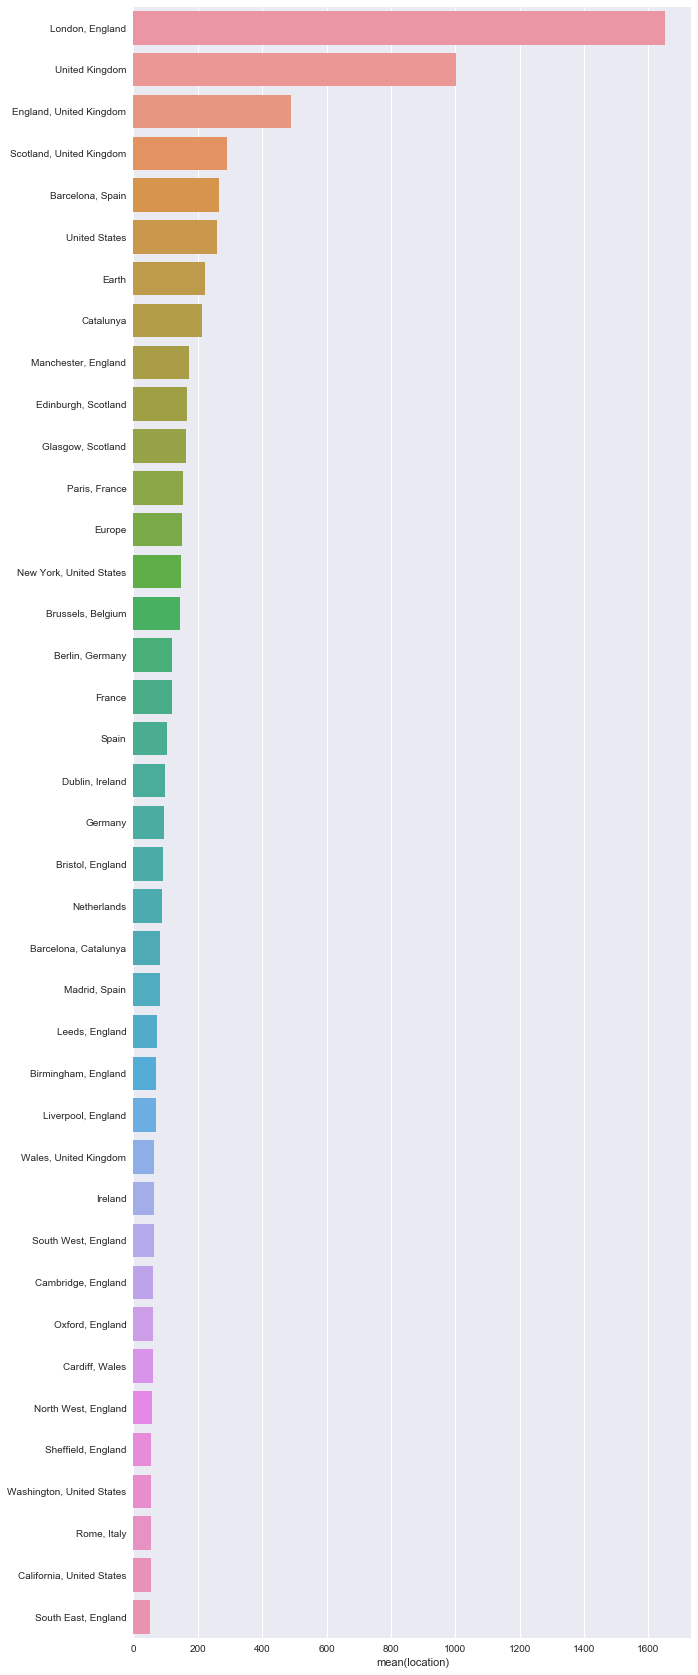

In [173]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 30)
sns.barplot(y=sig_locations.index,x=sig_locations['location'],ax=ax)
for tick in ax.get_yticklabels():
    tick.set_rotation(0)
plt.show()

In [174]:
#Countries only:
country_locations = {}
for k,v in sig_locations.iterrows():
    if "," in k:
        city, country = k.split(',')
        if not country[1:] in country_locations.keys():
            country_locations[country[1:]] = v['location']
        else:
            country_locations[country[1:]] += v['location']
    else:
        if not k in country_locations.keys():
            country_locations[k] = v['location']
        else:
            country_locations[k] += v['location']


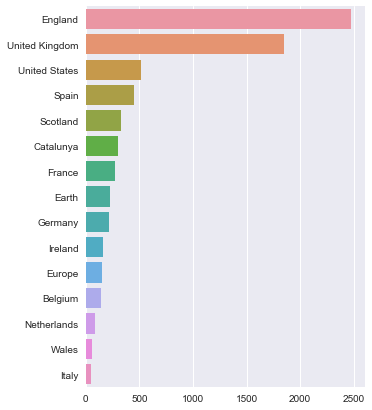

In [175]:
country_locations_df = pd.DataFrame(pd.Series(country_locations))[0].sort_values(ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(5, 7)
sns.barplot(y=country_locations_df.index,x=country_locations_df.values,ax=ax)
plt.show()

In [23]:
sub_locations = df_locations[df_locations['location'].index.str.contains(',')]

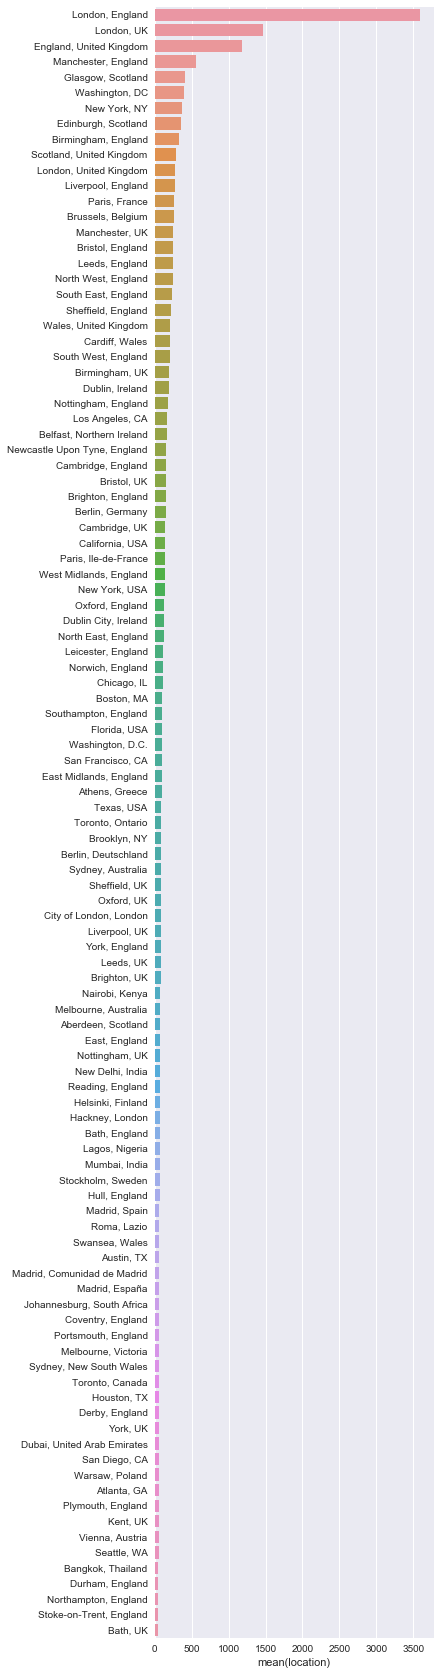

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 30)
sns.barplot(y=sub_locations[sub_locations['location'] > 50].index,x=sub_locations[sub_locations['location'] > 50]['location'],ax=ax)

In [11]:
fdata = data_23_user.sort_values(by="followers_count",ascending=False)

In [12]:
fdata

,friends_count,favourites_count,description,screen_name,geo_enabled,lang,verified,time_zone,statuses_count,followers_count,following,name,location,created_at
22903,231,417,advertising: talk.instagram@gmail.com,Notebook,False,en,True,Pacific Time (US & Canada),53004,6048871,None,The Notebook,None,Mon Jan 03 06:03:46 +0000 2011
2660,1765,2325,⛽️⛽️⛽️⛽️⛽️⛽️,lilyallen,True,en,True,London,24168,5966123,None,lily,WLDN,Mon Oct 27 13:23:17 +0000 2008
1117,0,5372,Motiverende Spreker | Blijf altijd dicht bij j...,Oceaanfietser,True,nl,False,Amsterdam,17623,5238952,None,Ebrahim Hemmatnia,Nederland,Sun Apr 03 11:52:44 +0000 2011
11276,176,4,Periodismo con carácter.,Milenio,False,es,True,Mexico City,512233,3971717,None,Milenio.com,México,Tue Mar 17 22:26:38 +0000 2009
28877,137,151,Expansión en alianza con CNN. Primer portal de...,ExpansionMx,True,es,True,Mexico City,471921,3904162,None,Expansión CNN,México,Tue Jan 26 22:41:22 +0000 2010
6721,15716,25,"Take me on an adventure ✈️ ,We don't own any o...",TheWorldStories,True,en,False,Chennai,60386,3340609,None,Travel Scenes ✈️,see link below,Tue Apr 19 08:44:53 +0000 2011
9485,3824,4,A picture is worth a thousand words! We don't ...,RealTouchingPic,False,en,False,New Delhi,4237,2183673,None,Pics With a Story,Don't forget to 'RT' if you like,Tue May 28 05:17:01 +0000 2013
26184,153,33,"✴Sharing quotes, excerpts and poetry, mostly f...",TheIifePost,True,en,False,Pacific Time (US & Canada),249092,2065530,None,My Thoughts :),None,Sun Nov 18 06:56:50 +0000 2012
10277,92,601,¿Sabias Que? Curiosidades. Cuenta sobre todo t...,sabiastuque_,False,es,False,Madrid,44060,2044762,None,Sabias? Curiosidades,España,Sat Jul 10 16:45:22 +0000 2010
6531,162,144,Cuenta de Twitter oficial. Sigue también a @La...,lajornadaonline,False,es,True,Mexico City,167593,1982409,None,La Jornada,México,Tue Apr 28 03:40:43 +0000 2009


In [13]:
data_1 = data_23[pd.notnull(data_23['retweeted_status'])] #I want to remove all the NaN values in retweeded_status

In [14]:
data_retweet = getRetweetData(data_1)

In [15]:
data_retweet.sort_values(by='retweeted',inplace=True,ascending=False)

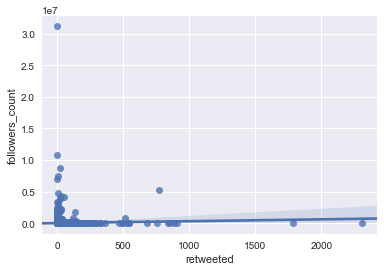

In [16]:
ax = sns.regplot(x='retweeted',y='followers_count',data=data_retweet)

In [17]:
from scipy.stats import pearsonr

pearsonr(data_retweet['retweeted'],data_retweet['followers_count'])

(0.032176240484498991, 0.016080877630393807)

In [18]:
data_retweet_f = data_retweet.sort_values(by='followers_count',ascending=False)

In [19]:
data_retweet_f

,user,retweeted,followers_count,created_at,location,hastags
3963,Harry Styles.,2,31174019,Sun Aug 22 14:19:06 +0000 2010,None,"[{'indices': [54, 70], 'text': 'RefugeesWelcom..."
3995,China Xinhua News,1,10781063,Thu Feb 09 01:10:18 +0000 2012,"Headquartered in Beijing, PRC","[{'indices': [0, 9], 'text': 'BREAKING'}, {'in..."
236,BBC News (UK),22,8761327,Mon Jan 08 08:05:57 +0000 2007,London,"[{'indices': [5, 12], 'text': 'Brexit'}, {'ind..."
3245,Le Monde,6,7478440,Mon Mar 16 18:44:51 +0000 2009,Paris,"[{'indices': [8, 15], 'text': 'Brexit'}]"
3096,Miranda Lambert,1,6960695,Thu Apr 23 21:37:36 +0000 2009,USA,"[{'indices': [89, 105], 'text': 'musicismedici..."
413,Ebrahim Hemmatnia,773,5238977,Sun Apr 03 11:52:44 +0000 2011,Nederland,"[{'indices': [59, 62], 'text': 'EU'}, {'indice..."
351,Department of State,4,4725960,Tue Oct 23 15:02:45 +0000 2007,"Washington, DC","[{'indices': [45, 59], 'text': 'EuropeanUnion'..."
666,Sky News,28,4298286,Thu Jul 19 14:42:53 +0000 2007,"London, UK",[]
383,CGTN,48,4180750,Thu Jan 24 03:18:59 +0000 2013,"Beijing, China","[{'indices': [6, 9], 'text': 'UK'}, {'indices'..."
2418,Milenio.com,22,3971719,Tue Mar 17 22:26:38 +0000 2009,México,"[{'indices': [29, 38], 'text': 'Norcorea'}, {'..."


In [13]:
import pandas as pd
data = pd.read_csv(r"2016-06-21_userdata.csv")

CParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [10]:
data

,Unnamed: 0,friends_count,favourites_count,description,screen_name,geo_enabled,lang,verified,time_zone,statuses_count,followers_count,following,name,location,created_at,retweeted_count
0,0,2277,3059,citizen of the world and staunch remainer.,verokins,True,en,False,NaN,7599,1075,NaN,Veronica ♥️🇪🇺🇬🇧,Norwich UK 🇪🇺,Tue Jan 20 13:21:33 +0000 2009,0.0
1,1,2260,496,"I am a f/t carer, part time volunteer @AVRBITT...",TimWorth1,True,en,False,London,68025,1808,NaN,τ!m ω0ɍ†ɧ,Bristol,Thu Mar 26 15:54:28 +0000 2009,0.0
2,2,130,666,Pandora's box,McEwanMorton,False,en,False,NaN,12074,76,NaN,McE.Morton,NaN,Wed Sep 01 21:05:50 +0000 2010,0.0
3,3,2708,4628,"Chercheur expatrié, actualité politique et spo...",Vert_Galant,True,en,False,London,44922,993,NaN,HenriIV,NaN,Thu May 19 06:19:48 +0000 2011,0.0
4,4,58,4653,NaN,Hughcampx,False,en,False,NaN,4814,37,NaN,Hugh C,NaN,Tue Jul 04 16:17:58 +0000 2017,0.0
5,5,235,0,Global Stock Brokers for the global on-line an...,globalbrokers,False,en,False,NaN,44458,864,NaN,Global Stock Broker,Mauritius and Gibraltar,Tue Jul 21 20:27:52 +0000 2009,0.0
6,6,185,952,En crisi permanent. No miro la TV. Lifelong Jo...,BCNRoger,True,es,False,Berlin,1097,50,NaN,BCNRoger /\ZI/\,"Horta, Catalonia.",Fri Jan 11 13:20:27 +0000 2013,0.0
7,7,1662,6660,🏴󠁧󠁢󠁳󠁣󠁴󠁿 #BEtheSPIDER Visca Catalunya lliure! #...,tradasro,False,en,False,Pacific Time (US & Canada),21710,1956,NaN,Tradasro,Toronto / Blairgowrie SCOTLAND,Tue Aug 26 21:49:13 +0000 2014,1.0
8,8,4967,2953,I believe #humanrights are being crushed by un...,giDwF,False,en-GB,False,NaN,3383,3107,NaN,giantDWARF,"Sheffield, England",Mon Mar 14 03:08:29 +0000 2016,0.0
9,9,1440,50661,Time to point and laugh at right wing snowflak...,LiberalIsland,True,en,False,NaN,86063,4097,NaN,liberalisland,NOT going away!,Tue Feb 25 18:06:31 +0000 2014,80.0


/Users/Finn/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 'U' mode is deprecated
  if __name__ == '__main__':


In [16]:
data

,Unnamed: 0,friends_count,favourites_count,description,screen_name,geo_enabled,lang,verified,time_zone,statuses_count,followers_count,following,name,location,created_at,retweeted_count
0,0,4137,5227,#CoventryCity #PUSB #SkyBlues #Liverpool #LFC ...,MarkyGCCFC,False,en,False,London,36401,5039,NaN,Marky G,"Warwickshire, England, UK",Wed Sep 12 14:38:59 +0000 2012,0.0
1,1,1421,4167,NaN,qprpete1937,True,en,False,London,7532,869,NaN,Peter Atherton,"Mattishall, Norfolk",Wed Aug 17 15:00:46 +0000 2011,0.0
2,2,1285,1542,Favours #voteNOtoGOyesformoremess,karrider,False,en,False,NaN,11247,1016,NaN,Voteout,NaN,Wed Mar 25 15:49:52 +0000 2009,0.0
3,3,263,18019,so u just gonna bring me a birthday gift on my...,MCRofficials,True,en,False,London,112102,17253,NaN,Stella/nsfr,intersectional feminist,Tue Oct 09 16:32:53 +0000 2012,0.0
4,4,278,1554,Interested in what goes around comes around in...,RichardSymonds,False,en,False,NaN,4868,264,NaN,Richard Symonds,Southern England,Tue May 18 16:34:06 +0000 2010,6.0
5,5,719,85,"Editor of Newcastle United Fanzine, true faith...",tfeditor1892,True,en,False,GMT,108050,6222,NaN,Michael Martin,Sunlit uplands of Tyneside,Mon Jul 16 22:01:29 +0000 2012,0.0
6,6,500,497,Where Independent minds collide,calummiller,True,en,False,Edinburgh,5723,537,NaN,Calum Miller,Prestonpans,Sat Feb 14 14:23:44 +0000 2009,3.0
7,7,1543,10605,Strong in EU. No TV; No Facebook; Pro ALL life...,MartynHobbins,False,en,False,NaN,8601,1034,NaN,Martyn Hobbins,Anywhere - not taken root,Sun Jan 24 16:08:41 +0000 2016,5.0
8,8,257,538,"Jack of all trades, master of none. Gamer, col...",chordbreak,True,en,False,London,2960,225,NaN,Gennie,"Ickford, England",Sat Jan 10 01:11:24 +0000 2009,0.0
9,9,1965,1024,"full time fun lover, party animal + producer\n...",theHELI,False,en,False,London,1661,1742,NaN,HELI™,Your headphones,Mon Feb 13 19:28:40 +0000 2012,0.0
